# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_fwf("brain_body.txt")

##Data Clean
###Analyzing the Given Datavvv

In [ ]:
print(df.shape)
df.head()

(62, 2)


,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

###There is No Duplicate Datas In Given Data Set, Now We Can Move Forward to Exploratory Data Analysis

###Finding Ouliers in Given Data Set By Two Way
>>1. Visualization of The Data Points In Boxplot
>>2. By Finding Interquartile Range $IQR$

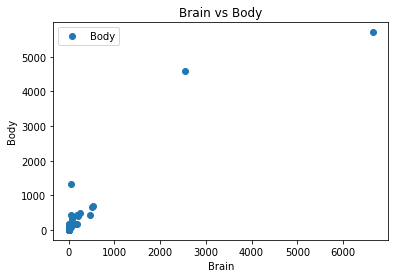

In [ ]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()


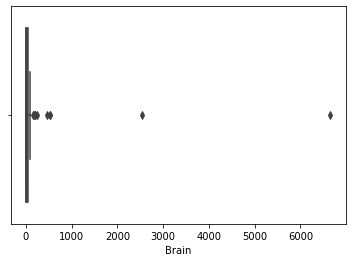

In [ ]:
import seaborn as sns
sns.boxplot(x = df["Brain"])

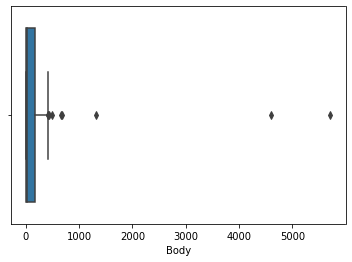

In [ ]:
sns.boxplot(x = df["Body"])

### IQR Method

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


###Finding of Interquartile Range And Lower Limit And Upper Limit Method

In [ ]:
def outlier_presence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower Limit ", lower_limit)
    print("Upper Limit ", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(df)

Interquartile Range of Brain is 47.6025
Lower Limit  -70.80375000000001
Upper Limit  119.60625
Outlier is Presented In Brain


Interquartile Range of Body is 161.75
Lower Limit  -238.375
Upper Limit  408.625
Outlier is Presented In Body




###From Above Box Plot And Finding of Interquartile Range We Can Know That Outliers Present In Both Brain And Body

In [ ]:
def Outlier_Data_Points(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)] # Here We Find The All outliers In Given Data set
    if outliers.shape[0] != 0:
      print("Outlier is Presented In " + i + "is")
      for j in outliers[i]:
        print(j)
      print("\n")
    else:
      print("No Outlier is Presented In",i )
    # if outliers.empty: 
    #   print("No Outlier is Presented In",i )
    # else:
    #   print("Outlier is Presented In " + i + "is")
    #   for j in outliers[i]:
    #     print(j)
    #   print("\n")
Outlier_Data_Points(df)

Outlier is Presented In Brainis
465.0
2547.0
187.1
521.0
529.0
207.0
6654.0
250.0
192.0
160.0


Outlier is Presented In Bodyis
423.0
4603.0
419.0
655.0
680.0
1320.0
5712.0
490.0
440.0




In [ ]:
df_cap = df.copy()
df_trm = df.copy()
print(df_cap.shape)
print(df_trm.shape)
print(df.shape)

(62, 2)
(62, 2)
(62, 2)


##Capping Outliers using the IQR method

In [ ]:
def Capping_Outlier(df_cap):
  for i in df_cap.keys():
    Q1 = df_cap[i].quantile(0.25)
    Q3 = df_cap[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    df_cap[i] = np.where(df_cap[i]<lower_limit, lower_limit, np.where(df_cap[i]>upper_limit, upper_limit, df_cap[i])) # Here We Replace The All outliers with whiskers(lower_limit and upper_limit)
    print("Outliers in " + i + " Are Capped Using Capping Method")
    # print(df_cap[i].nunique())
    print(df_cap.shape)
  return df_cap
df_cap = Capping_Outlier(df_cap)

Outliers in Brain Are Capped Using Capping Method
(62, 2)
Outliers in Body Are Capped Using Capping Method
(62, 2)


In [ ]:
outlier_presence(df_cap)

Interquartile Range of Brain is 47.6025
Lower Limit  -70.80375000000001
Upper Limit  119.60625
Outlier is Not Presented In Brain


Interquartile Range of Body is 161.75
Lower Limit  -238.375
Upper Limit  408.625
Outlier is Not Presented In Body




##Trimming Method For Outliers

In [ ]:
def Trimming_Outlier(df_trm):
  drop_outliers = np.array([])
  for i in df_trm.keys():
    Q1 = df_trm[i].quantile(0.25)
    Q3 = df_trm[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    indexes= df_trm[(df_trm[i]<lower_limit) | (df_trm[i]>upper_limit)].index # Here We Found The All outliers Indexes In Given Data set
    drop_outliers = np.append(drop_outliers, indexes)
  dropped = np.unique(drop_outliers) # Here We Will drop The outliers By outliers Indexes
  print(dropped)
  df_trm = df_trm.drop(dropped)
  print("Outliers Are Removed From Data set")
  return df_trm
df_trm = Trimming_Outlier(df_trm)

##Finding The Relationship Between The Chirps/Second And Ground Temperature

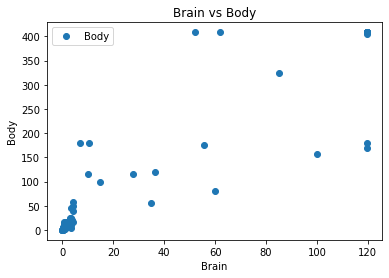

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
df_cap.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

df.corr()

###From Scatter Plot And Correlation Values We Can Find That There Is Good Linear Relation Between Chirps/Second and Ground Temperature, So We Can Develop Linear Regression Model

##Data Jar

###Splitting Of Data Into Train Data Set And Test Data set, Train Data set Used For Train The Model, Test Data Used For Testing The Model That Trained From Train Data set

In [ ]:
X = df_cap.loc[:, ['Brain']].values 
y = df_cap.loc[:, 'Body'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

#Task 1
##1. Find the linear regression equation for this data for brain weight to body weight.

##Answer is Y = X*M + C
##Y is Our Target Variable, X Is Our Feature , M&C Are The Model Parameters,  M is the Slope, C is Intercept

##Model Jar

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test) 
y_pred

array([ 33.55226323,  28.00061343, 114.89038813, 333.35749068,
       184.60878091, 333.35749068, 243.9985229 ,  26.45131582,
        34.97245271,  24.52760461, 282.73096333, 333.35749068,
        28.90437038, 333.35749068,  33.8104795 ,  24.82971764,
        24.77549223, 333.35749068,  27.09685649])

In [ ]:
New_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
New_df

,Actual,Predicted
0,10.800,33.552263
1,8.100,28.000613
2,56.000,114.890388
3,408.625,333.357491
4,408.625,184.608781
5,408.625,333.357491
6,325.000,243.998523
7,12.300,26.451316
8,17.000,34.972453
9,0.140,24.527605


###The Model Automatically Learned M&C From Given Data Set

In [ ]:
print(regressor.intercept_) # c
print(regressor.coef_) # slope - m

24.51469379469316
[2.5821627]


##2. Chart the original data and the equation on the chart.

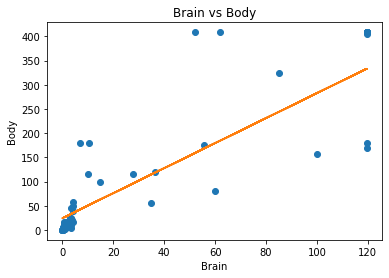

In [ ]:
y_pred = regressor.predict(X) 
plt.plot(X, y, 'o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.plot(X, y_pred)

##3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
from sklearn import metrics
y_pred = regressor.predict(X_test) 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8299815065706626


##ANS: The R2 Score Value Of This Model is 0.8 it's Lower Than 0.8. This Equation is Good Fit For this Data